## Table of Contents
* [Introduction](#Euro-Exchange-Rates-From-1999-to-2021)
* [Data Cleaning](#Data-Cleaning)
* [Rolling Mean](#Rolling-Mean)
* [Exchange Rates During Different Presidencies](#Exchange-Rates-for-Different-Presidential-Terms)
* [Cleaning Other Data for Other Currencies](#Cleaning-Data-for-Other-Currencies)
* [Visualizing Different Currencies](#Visualizing-Different-Exchange-Rates)
* [Conclusion](#Conclusion)

# Euro Exchange Rates From 1999 to 2021

We will be analyzing [this dataset](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) to show how the Euro exchange rate with various countries has changed over the years has changed over the years. Specifically, we will be looking to show how the Euro to US standard dollar (USD) exchange rate has changed over the course of the last three presidencies (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We will also be comparing how the Euro exchange rate to USD compares to the exchange rates to the Hong Kong dollar, Canadian dollar, and Australian dollar. To start, we will simply import all the necessary python libraries and read in our dataset `euro-daily-hist_1999_2020.csv` and assign it to a variable `exchange rates`.

In [1]:
# Imports all the necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv') # Reads in and stores csv
print(exchange_rates) # prints dataset so we can inspect it and verify it loaded correctly

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0      2021-01-08               1.5758           1.9558            6.5748   
1      2021-01-07               1.5836           1.9558            6.5172   
2      2021-01-06               1.5824           1.9558            6.5119   
3      2021-01-05               1.5927           1.9558            6.5517   
4      2021-01-04               1.5928           1.9558            6.3241   
...           ...                  ...              ...               ...   
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
0       

Now that we have loaded our dataset, lets use the `.info()` method to print basic information about our dataset.

In [2]:
exchange_rates.info() # Prints basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

We can see that there are 5,699 rows of data, 41 total colums, and 40 different currencies in the dataset. The different currencies are denoted by the column data and the rows denote how the exchange rates at different days over the span of the dataset. There are many null values, in particular in the series `[Greek drachma ]`, as there are over 5,000 null values. However, the USD column has zero null values. And 38 of the 41 columns are object data types. The other three columns are floats. The USD column is an object data type.

## Data Cleaning

Before further analyzing our dataset `exchange_rates`, we will need to clean our dataset. Specifically, we will focus on isolating the series `[US dollar ]` and `Period\\Unit:`, and rename them to `US_dollar` and `Time` so they're easier to work with. We will then assign those series to a new dataset `euro_to_dollar` so we can specifically analyze the relationship between the Euro to USD exchange rate over time. But first, we'll rename our series and convert them to a datatype that's easier to work with..

In [3]:
exchange_rates.rename(columns = {'[US dollar ]':'US_dollar', 
                                 'Period\\Unit:': 'Time'},
                     inplace = True) # Renames columns
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # Converts Time to datetime
print(exchange_rates.info()) # Verify columns and data types were reassigned correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5699 non-null   datetime64[ns]
 1   [Australian dollar ]      5699 non-null   object        
 2   [Bulgarian lev ]          5297 non-null   object        
 3   [Brazilian real ]         5431 non-null   object        
 4   [Canadian dollar ]        5699 non-null   object        
 5   [Swiss franc ]            5699 non-null   object        
 6   [Chinese yuan renminbi ]  5431 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           5699 non-null   object        
 9   [Danish krone ]           5699 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      5699 non-null   object        
 12  [Greek drachma ]    

Now that we've renamed our columns and reassigned `Time` to datetime type, lets change them to data types that are easier to work with and assign them to our new dataset `euro_to_dollar`. Specifically, we will change `US_dollar` to a float.

In [4]:
usd_counts = exchange_rates['US_dollar'].value_counts().sort_values() # Creates list of all unique values

print(usd_counts) # Prints unique exchange rate values to see if there's anything wrong

1.2469     1
1.0785     1
1.4921     1
1.2305     1
1.1990     1
          ..
1.3086     6
1.1305     7
1.1215     8
1.2276     9
-         62
Name: US_dollar, Length: 3528, dtype: int64


We can see that 62 rows in `US_dollar` contain only a dash and no numeric value, so we will have to remove those rows from the set before converting the series to float values.

In [5]:
# Removes rows from the dataset that contains a dash in the series US_dollar
exchange_rates = exchange_rates[exchange_rates['US_dollar'] != '-']
usd_counts = exchange_rates['US_dollar'].value_counts().sort_values() # Creates list of all unique values in the series

print(usd_counts) # Prints unique exchange rate values to see if we removed the rows correctly

1.3920    1
1.0785    1
1.4921    1
1.2305    1
1.1990    1
         ..
1.0867    6
1.3532    6
1.1305    7
1.1215    8
1.2276    9
Name: US_dollar, Length: 3527, dtype: int64


We can see that we have successfully removed the problematic rows, so we will now add the series to our dataset.

In [6]:
euro_to_dollar = pd.DataFrame(exchange_rates['Time']) # initializes dataframe with 'Time' column
euro_to_dollar['US_dollar'] = exchange_rates['US_dollar'].astype(float) # Assigns usd series as a float to dataset

print(euro_to_dollar.info()) # verifies data was correctly assigned to dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
None


We can now see that we have successfully transformed the datatype of both series and assigned them to our new dataframe `euro_to_dollar`.

## Rolling Mean

Now that we have a cleaned dataset to work with, we will begin visualizing our data set. To begin, we will use a rollng mean of one month (30 days) to visualize how the exchange rate changes month over month over the course of the dataset.

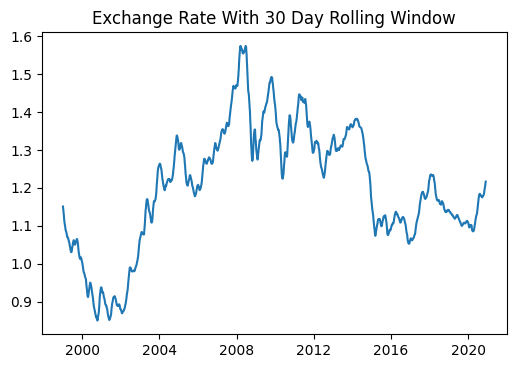

In [7]:
# Below code allows plots to be displayed in notebook
%matplotlib inline 

# Plots and displays graph of rolling mean exchange rate vs time with a title
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean())
plt.title('Exchange Rate With 30 Day Rolling Window')
plt.show()

We can see that, from our graph, the exchange rate bottomed out around 2001 and 2002, peaked in 2008, and eventually started to level off around 2015 at the value it was at the beginning of our dataset.

## Exchange Rates for Different Presidential Terms

Now that we've cleaned and prepared our dataset, we can now create a visualization that shows how the Euro to USD exchange rate changed over the years. To do this, we are going to create 3 seperate graphs that show the exchange rates as a time series over the course of all three presidencies, as well as a single graph that denotes the exchange rates during each presidency. To start, we will create our initial 

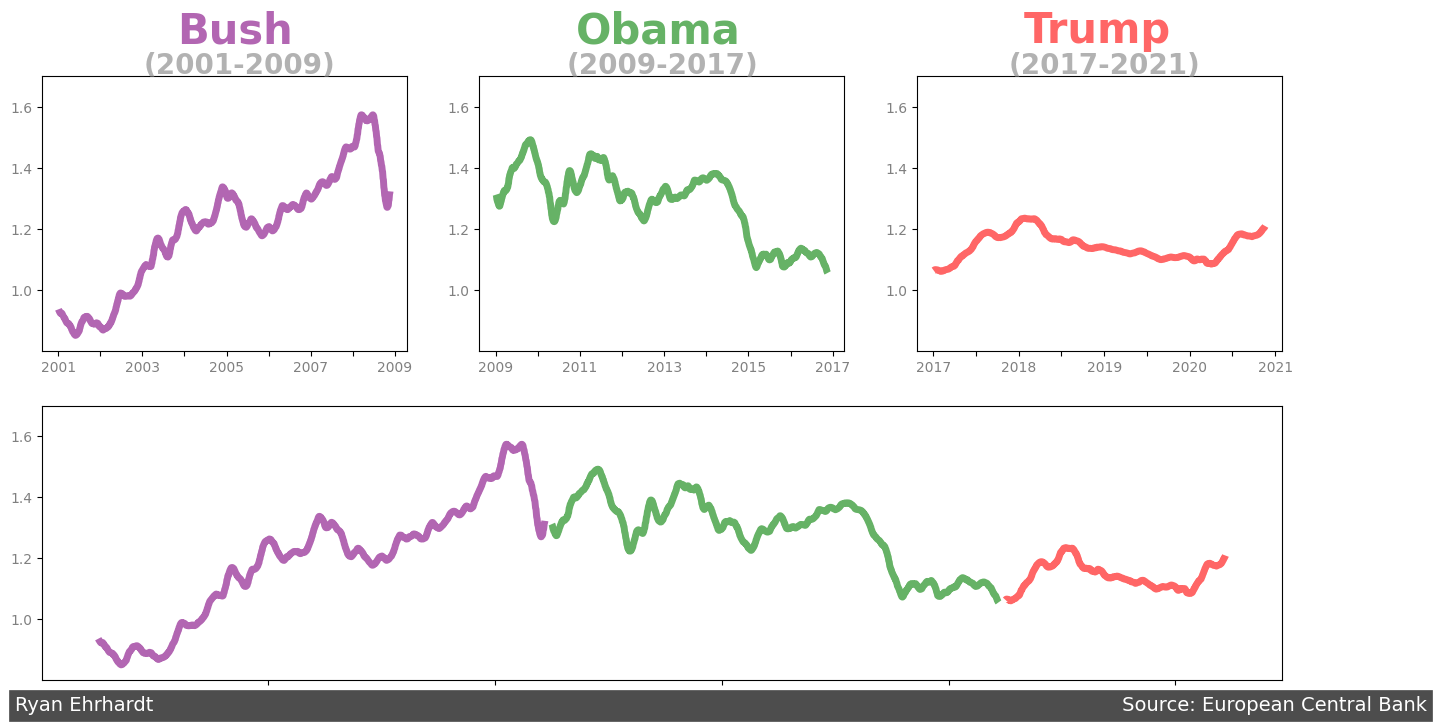

In [8]:
plt.figure(figsize = (16,8)) # initializes figure
# Initializes top row as 3 figures
ax1 = plt.subplot(2,3,1) 
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
# Initializes bottom row as one figure
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4] # Creates iterable array of axes

# assigns variables to be plotted in each graph
all_potus_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)] # Data across all presidents
bush_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)]
obama_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)]
trump_data = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)]

style.use('fivethirtyeight') # Assigns style of graph

# creates plot for each president with the rolling mean from the data we created
ax1.plot(bush_data['Time'], bush_data['US_dollar'].rolling(30).mean(), 
         color = 'purple', alpha = .6, linewidth = 5)
ax2.plot(obama_data['Time'], obama_data['US_dollar'].rolling(30).mean(), 
         color = 'green', alpha = .6, linewidth = 5)
ax3.plot(trump_data['Time'], trump_data['US_dollar'].rolling(30).mean(), 
         color = 'Red', alpha = .6, linewidth = 5)


ax4.grid(axis = 'x', visible = False) # Turns off vertical grid lines

# Sets tick labels for each plot
ax1.set_xticklabels(['','2001','', '2003','', '2005','', '2007','', '2009'], 
                   color = 'grey')
ax2.set_xticklabels(['','2009','', '2011','', '2013','', '2015','', '2017'], 
                   color = 'grey')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], 
                   color = 'grey')
ax4.set_xticklabels([])
for ax in axes: # loop assigns y tick labels and limits to all plots
    ax.set_ylim(.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], color = 'grey')
    
# sets titles and subtitles for each plot
ax1.text(731516.0, 1.81, 'Bush', size = 30, color = 'purple', weight = 'bold',
        alpha = .6)
ax1.text(731230.0, 1.71, '(2001-2009)', size = 20, color = 'grey', weight = 'bold',
        alpha = .6)
ax2.text(734100.0, 1.81, 'Obama', size = 30, color = 'green', weight = 'bold',
        alpha = .6)
ax2.text(734020.0, 1.71, '(2009-2017)', size = 20, color = 'grey', weight = 'bold',
        alpha = .6)
ax3.text(736716.0, 1.81, 'Trump', size = 30, color = 'Red', weight = 'bold',
        alpha = .6)
ax3.text(736650.0, 1.71, '(2017-2021)', size = 20, color = 'grey', weight = 'bold',
        alpha = .6)


# Plots data from each presidncy as one continuous time series
ax4.plot(bush_data['Time'], bush_data['US_dollar'].rolling(30).mean(), 
         color = 'purple', alpha = .6, linewidth = 5)
ax4.plot(obama_data['Time'], obama_data['US_dollar'].rolling(30).mean(), 
         color = 'green', alpha = .6, linewidth = 5)
ax4.plot(trump_data['Time'], trump_data['US_dollar'].rolling(30).mean(), 
         color = 'Red', alpha = .6, linewidth = 5)

ax4.text(729950, .7, 'Ryan Ehrhardt' + ' '*155 + 'Source: European Central Bank', 
         backgroundcolor = '#4d4d4d', color = 'white')


plt.show()

In our graph, we can see the following basic trends for the exchange rate during each presidency:
* Bush: Increased
* Obama: Decreased
* Trump: Remained Level

## Cleaning Data for Other Currencies

Now that we've analyzed the trend in the United States specifically, we are going to expand our analysis and examine how the Euro to USD exhange rate compares to the Euro exhcange rates to the Canadian dollar (CD), Australian dollar (AD), and the Hong Kong dollar (HKD). To do this, we will first use similar methods to clean the data for these other currencies that we used to prepare the data for the USD.

In [9]:
exchange_rates.rename(columns = {'[Canadian dollar ]':'Canadian_dollar',
                      '[Hong Kong dollar ]':'HK_dollar',
                      '[Australian dollar ]':'Australian_dollar'},
                     inplace = True) # Renames Columns

# Below stores unique values of each exchange rate
hkd_values = exchange_rates['HK_dollar'].value_counts().sort_values()
cd_values = exchange_rates['Canadian_dollar'].value_counts().sort_values()
ad_values = exchange_rates['Australian_dollar'].value_counts().sort_values()

# Prints all unique values to see if there's any data that needs to be removed
print(hkd_values, '/n', cd_values, '/n', ad_values)

6.9023     1
10.4011    1
7.0405     1
8.4150     1
8.7790     1
          ..
8.6987     3
9.6059     3
10.7501    3
8.7849     3
10.5967    3
Name: HK_dollar, Length: 5242, dtype: int64 /n 1.3304    1
1.2510    1
1.5316    1
1.6219    1
1.6580    1
         ..
1.4097    7
1.4213    7
1.4023    8
1.4063    8
1.5601    8
Name: Canadian_dollar, Length: 2930, dtype: int64 /n 1.8292    1
1.2651    1
1.4640    1
1.4545    1
1.8178    1
         ..
1.6175    7
1.6194    7
1.6070    7
1.6294    7
1.6242    8
Name: Australian_dollar, Length: 3469, dtype: int64


We didn't see any irregularities, so we'll now convert our data to float values and create a dataframe for each currency.

In [10]:
# Initializing dataframes with time series
euro_to_cd = pd.DataFrame(exchange_rates['Time']) # Canadian
euro_to_ad = pd.DataFrame(exchange_rates['Time']) # Australiian
euro_to_hkd = pd.DataFrame(exchange_rates['Time']) # Hong Kong

# assigns exchange rates to respective dataframes
euro_to_cd['Canadian_dollar'] = exchange_rates['Canadian_dollar'].astype(float)
euro_to_ad['Australian_dollar'] = exchange_rates['Australian_dollar'].astype(float)
euro_to_hkd['HK_dollar'] = exchange_rates['HK_dollar'].astype(float)

# Displays information about new dataframes to verify they were created correctly
euro_to_cd.info()
euro_to_ad.info()
euro_to_hkd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             5637 non-null   datetime64[ns]
 1   Canadian_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               5637 non-null   datetime64[ns]
 1   Australian_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   da

## Visualizing Different Exchange Rates

Now that we have cleaned and organized our data for analysis, we will now create a visualization that showcases how the different currency exchange rates have changed over time.

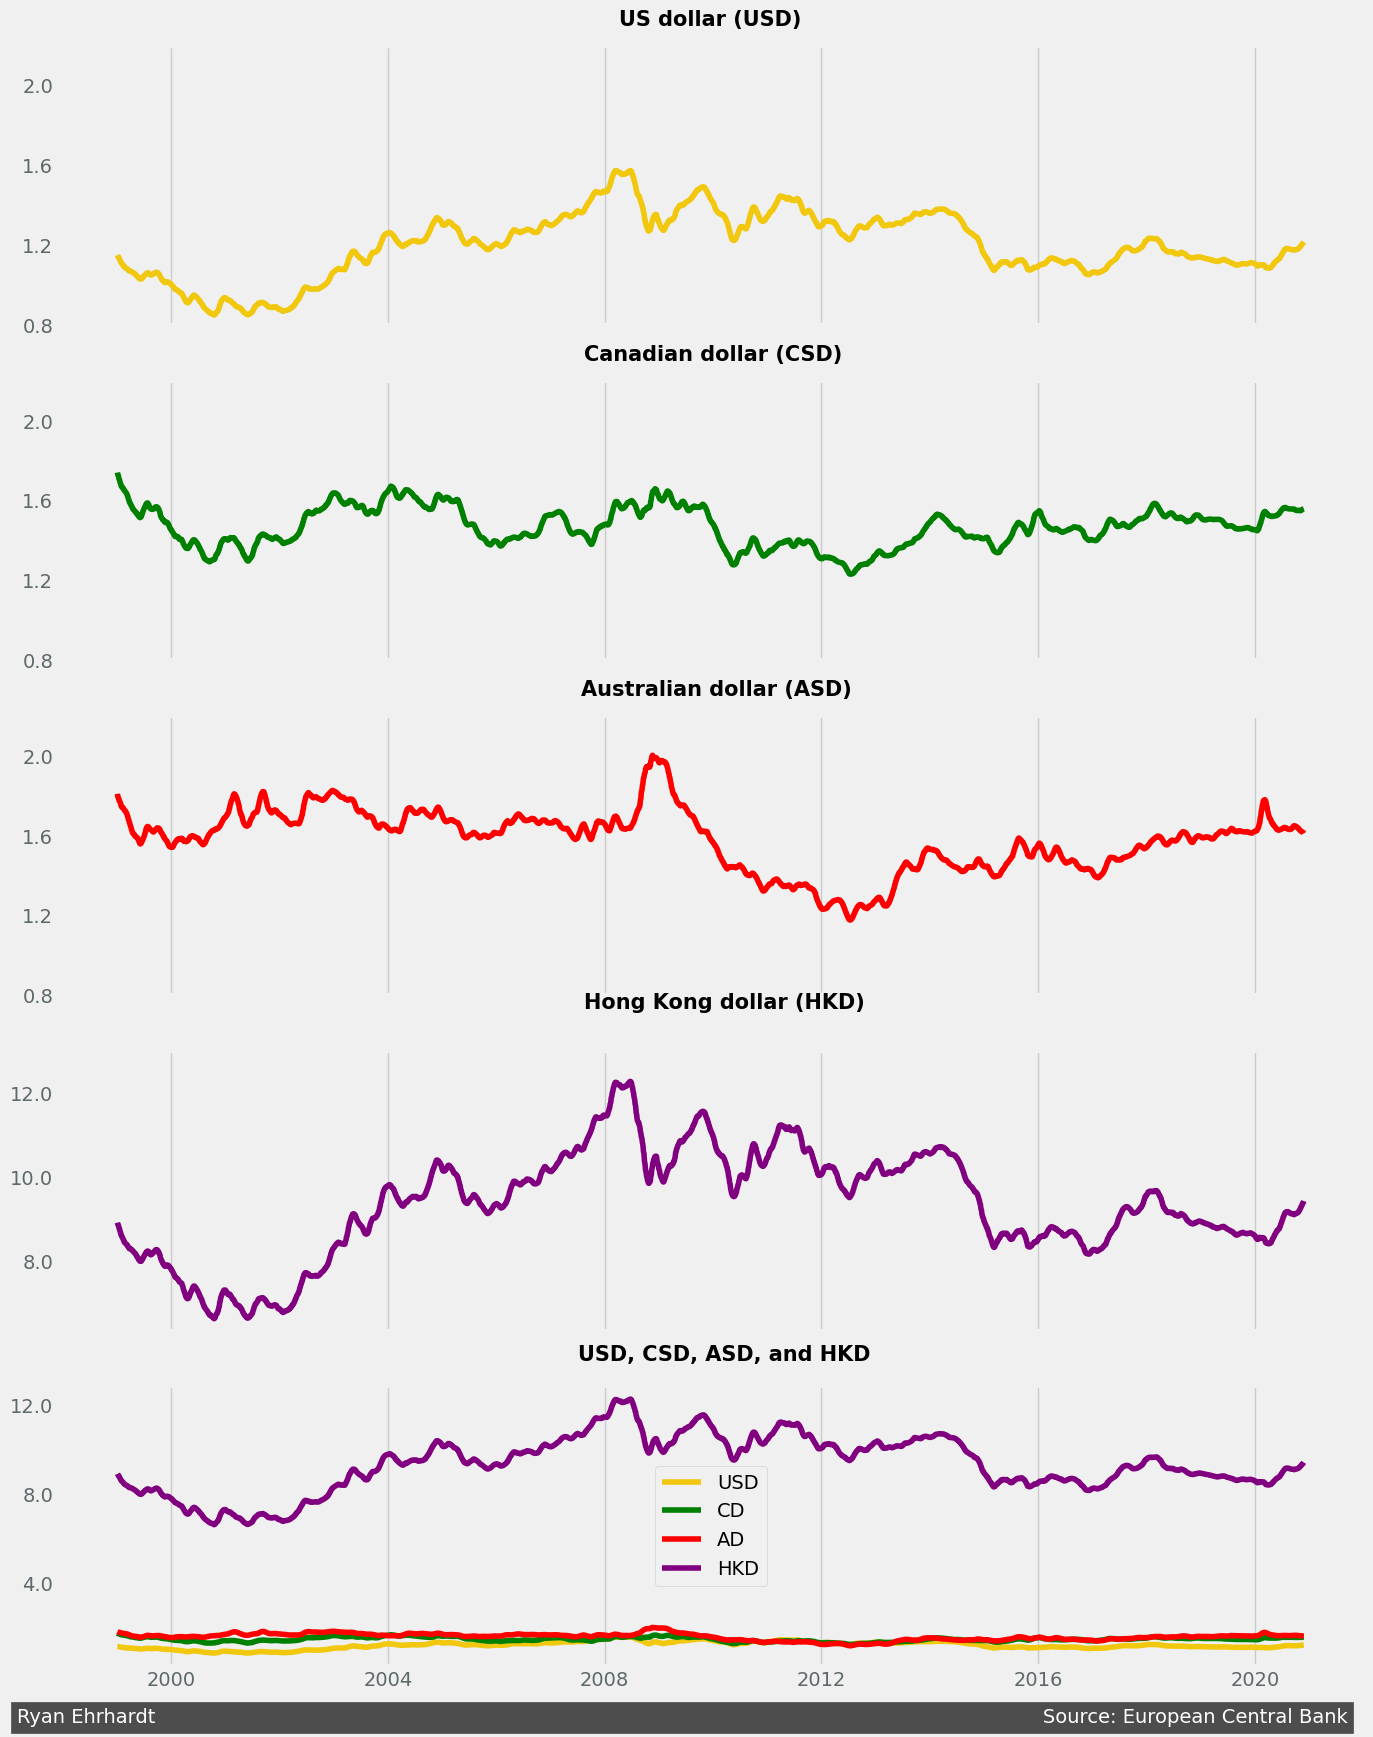

In [11]:
plt.figure(figsize = (15,20)) # initialize figure

# initializes each plot
ax1 = plt.subplot(5,1,1)
ax2 = plt.subplot(5,1,2)
ax3 = plt.subplot(5,1,3)
ax4 = plt.subplot(5,1,4)
ax5 = plt.subplot(5,1,5)

# Creates iterateable array of each subplots
axes = [ax1, ax2, ax3] 

style.use('fivethirtyeight') # Assigns style for graphs

# create each plot
ax1.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean(), 
        color = '#f2c80f')
ax2.plot(euro_to_cd['Time'], euro_to_cd['Canadian_dollar'].rolling(30).mean(), 
        color = 'green')
ax3.plot(euro_to_ad['Time'], euro_to_ad['Australian_dollar'].rolling(30).mean(), 
        color = 'red')
ax4.plot(euro_to_hkd['Time'], euro_to_hkd['HK_dollar'].rolling(30).mean(), 
        color = 'purple')

# loop formats USD, CSD, and ASD graphs
for ax in axes:
    ax.set_xticklabels([])
    ax.grid(axis = 'y', visible = False)
    ax.set_yticks([.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
    ax.set_yticklabels(['0.8', '', '1.2', '', '1.6', '', '2.0', ''], 
                       color = '#374649', alpha = .8)

#formats hong kong graph
ax4.set_xticklabels([])
ax4.grid(axis = 'y', visible = False)
ax4.set_yticks([7, 8, 9, 10, 11, 12, 13])
ax4.set_yticklabels(['', '8.0', '', '10.0', '', '12.0', ''], 
                    color = '#374649', alpha = .8)
    
# Plots all currencies onto same graph for comparison
ax5.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean(),
        color = '#f2c80f')
ax5.plot(euro_to_cd['Time'], euro_to_cd['Canadian_dollar'].rolling(30).mean(),
        color = 'green')
ax5.plot(euro_to_ad['Time'], euro_to_ad['Australian_dollar'].rolling(30).mean(),
        color = 'red')
ax5.plot(euro_to_hkd['Time'], euro_to_hkd['HK_dollar'].rolling(30).mean(),
        color = 'purple')

# formats combined plot
ax5.legend(['USD', 'CD', 'AD', 'HKD']) # creates legend
ax5.set_yticklabels(['0.0', '', '4.0', '', '8.0', '', '12.0'],
                   color = '#374649', alpha = .8) # formats y tick labels
ax5.grid(axis = 'y', visible = False) # Turns off grid lines
ax5.set_xticklabels(['', '2000', '2004', '2008', '2012', '2016', '2020'],
               color = '#374649', alpha = .8)

# Creates headers for each graph
ax1.text(733140, 2.3, 'US dollar (USD)', weight = 'bold', 
        size = 15)
ax2.text(732900, 2.3, 'Canadian dollar (CSD)', weight = 'bold', 
        size = 15)
ax3.text(732880, 2.3, 'Australian dollar (ASD)', weight = 'bold', 
        size = 15)
ax4.text(732900, 14, 'Hong Kong dollar (HKD)', weight = 'bold', 
        size = 15)
ax5.text(732860, 14, 'USD, CSD, ASD, and HKD', weight = 'bold', 
        size = 15)

ax5.text(729080, -2.3, 'Ryan Ehrhardt' + ' '*142 + 'Source: European Central Bank', 
         backgroundcolor = '#4d4d4d', color = 'white')

plt.show()

We can see that the exchange rate from Euro to CSD and ASD is typically slightly higher than the Euro to USD exchange rate. The rates are all generally within the same 1.0 to 2.0 range. However, each of those exchange rates are significantly lower than the Euro to HKD exhcange rate, with the Euro to HKD exchange rate typically falling between 8.0 and 12.0. One relationship we do see with HKD is that it tends to follow the same pattern of fluctuation as USD. Typically, as USD goes up, HKD goes up, and vice versa. CSD and ASD also appear to follow a similar pattern as USD, but neither currency exchange rate follow a near identical pattern to USD quite like HKD does.

## Conclusion

After exploring the dataset, we have came to the following conclusions:

* Presidencies vs. Exchange Rate
  - __Bush__: Exchange rate increased
  - __Obama__: Exchange rate decreased
  - __Trump__: Exchange rate remained level
***
* Exchange Rates for Different Currencies
  - __USD__: Lowest exchange rate.
  - __CSD and ASD__: Higher exchange rate than USD and fluctuates in a similar way, but it's not identical.
  - __HKD__: Much higher exchange rate than other currencies, but fluctuation pattern is nearly identical to USD.